In [ ]:
import numpy as np
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
from sklearn.decomposition import PCA
import torchvision.transforms as transforms
from copy import deepcopy
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainData = datasets.CIFAR10(root='./data', download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [ ]:
xTrain = trainData.data
xTrain = ((xTrain/255) -0.5)/0.5 
print(xTrain.shape)
yTrain = trainData.targets
yTrain = np.array(yTrain)
print(yTrain[0])

(50000, 32, 32, 3)
6


In [ ]:
label_of_int = 3 #baseline generation starts
label_wala_data = xTrain[yTrain==label_of_int] 
print(label_wala_data.shape)

(5000, 32, 32, 3)


In [ ]:
img_of_int = np.mean(label_wala_data, 0)
img_of_int = img_of_int*0.5+0.5
print(img_of_int.shape)
label_wala_plot = label_wala_data[0]
label_wala_plot = label_wala_plot*0.5+0.5

(32, 32, 3)


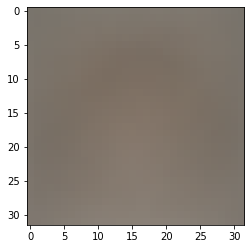

In [ ]:
plt.imshow(img_of_int) #ends
# plt.imshow(label_wala_plot)

In [ ]:
def imshow(img,label,idx):
    plt.imshow(img[idx])
    print(label[idx])

def unenrollImage(img):
    unenImg = img.reshape(-1,img.shape[1]*img.shape[2])
    return unenImg

9
(50000, 3072)


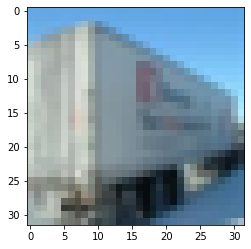

In [ ]:
imshow(trainData.data,yTrain,15)
#Splitting into channels
blue,green,red = cv2.split(trainData.data[15])

blue_images = xTrain[:, :, :,0]
green_images = xTrain[:, :, :,1]
red_images = xTrain[:, :, :,2]

blue_images = np.reshape(blue_images, (blue_images.shape[0], (blue_images.shape[1]*blue_images.shape[2])))
green_images = np.reshape(green_images, (green_images.shape[0], (green_images.shape[1]*green_images.shape[2])))
red_images = np.reshape(red_images, (red_images.shape[0], (red_images.shape[1]*red_images.shape[2])))

final_array = np.hstack((blue_images, green_images, red_images))
print(final_array.shape)


In [ ]:
def pca2(X,components=3):
    pca2 = PCA(n_components=components,svd_solver='full')
    pca2.fit(X)
    return pca2

In [ ]:
model = pca2(final_array, 0.95)

In [ ]:
final_array_score = np.dot(final_array, model.components_.T)
final_array_loadings = model.components_

In [ ]:
final_recon = np.dot(final_array_score, final_array_loadings)

final_recon_blue = final_recon[:, :1024]
final_recon_green = final_recon[:, 1024:2048]
final_recon_red = final_recon[:, 2048:3072]

final_recon_blue = np.reshape(final_recon_blue, (50000, 32,32))
final_recon_green = np.reshape(final_recon_green, (50000, 32,32))
final_recon_red = np.reshape(final_recon_red, (50000, 32,32))
print(final_recon_blue.shape)

(50000, 32, 32)


In [ ]:
array_to_show = np.stack((final_recon_blue, final_recon_green, final_recon_red), axis=3)
print(array_to_show.shape)
array_to_show = (array_to_show*0.5+0.5)


(50000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


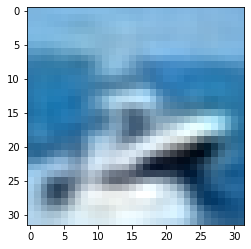

In [ ]:
plt.imshow(array_to_show[8])
data = trainData.data
#plt.imshow(data[600])

In [ ]:
print(final_array_score.shape)

(50000, 217)


**MOVEMENT TO CLUSTER CENTER**

In [ ]:
class_to_cluster = 9 #cluster centre movement begins here
score_arr_copy = deepcopy(final_array_score)
loading_copy = deepcopy(final_array_loadings)
model_scores_to_cluster = deepcopy(final_array_score[yTrain==class_to_cluster])
#print(np.where(score_arr_copy[yTrain==class_to_cluster]))
print(model_scores_to_cluster.shape)

(5000, 217)


In [ ]:
avg_scores = np.mean(model_scores_to_cluster, 0)
print(avg_scores.shape)

(217,)


In [ ]:
img_to_move = 0
original_score = model_scores_to_cluster[img_to_move]
new_score = model_scores_to_cluster[img_to_move] + (avg_scores - model_scores_to_cluster[img_to_move])*0.5
recon = np.dot(new_score, loading_copy)
original_img = np.dot(original_score, loading_copy)
avg_img = np.dot(avg_scores, loading_copy)
print(recon.shape)
print(original_img.shape)


(3072,)
(3072,)


In [ ]:
def make_img(p_recon):

  p_recon_blue = p_recon[:1024]
  p_recon_green = p_recon[1024:2048]
  p_recon_red = p_recon[2048:3072]

  p_recon_blue = np.reshape(p_recon_blue, (32,32))
  p_recon_green = np.reshape(p_recon_green, (32,32))
  p_recon_red = np.reshape(p_recon_red, (32,32))
  print(p_recon_blue.shape)


  p_array_to_show = np.stack((p_recon_blue, p_recon_green, p_recon_red), axis=2)

  p_array_to_show = (p_array_to_show*0.5+0.5)
  return p_array_to_show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32)
(32, 32)
(32, 32)


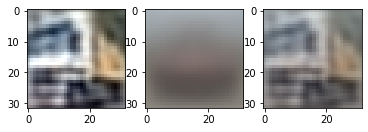

In [ ]:
plt.subplot(131)
plt.imshow(make_img(original_img))
plt.subplot(132)
plt.imshow(make_img(avg_img))
plt.subplot(133)
plt.imshow(make_img(recon))

**RANDOM PERTUBATION + ALEXNET INFERENCE**

In [ ]:
def random_purt(img_index): #random begins here
  score_arr_rand = deepcopy(final_array_score)
  loading_rand = deepcopy(final_array_loadings)
  score_int = score_arr_rand[img_index]
  print(classes[yTrain[0]])
  print(classes[yTrain[img_index]])
  score_int = score_int + np.random.normal(0, 0.05)
  recon = np.dot(score_int, loading_rand)
  plt.imshow(make_img(recon))
  return make_img(recon),yTrain[img_index]



frog
deer
(32, 32)
(32, 32)


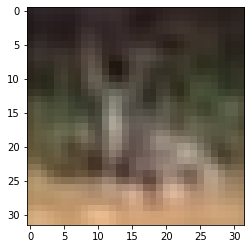

In [ ]:
randidx =np.random.randint(0,10000)
rimg,label = random_purt(randidx)

In [ ]:
 
PATHDense = '/content/gdrive/MyDrive/CIS520_models/model_best.pth.tar'

In [ ]:

__all__ = ['alexnet']

class AlexNet(nn.Module):

    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


def alexnet(**kwargs):
    r"""AlexNet model architecture from the
    `"One weird trick..." <https://arxiv.org/abs/1404.5997>`_ paper.
    """
    model = AlexNet(**kwargs)
    return model

In [ ]:
alexModel = AlexNet().float()
# original saved file with DataParallel
checkpoint = torch.load(PATHDense)
state_dict = checkpoint['state_dict']
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    if k=="classifier.weight" or k=="classifier.bias":
      name = k
    else:
      name = k[:8]+k[15:] # remove `module.`
    new_state_dict[name] = v
# load params
alexModel.load_state_dict(new_state_dict)

<All keys matched successfully>

In [ ]:
def show_img(idx,trainset):
    img = trainset[idx][0]
    plt.imshow(trainset.data[idx]/255)
def show_pimg(noisy_decoded):
    noisy_red_decoded = noisy_decoded[0].detach().cpu().numpy()
    noisy_blue_decoded = noisy_decoded[1].detach().cpu().numpy()
    noisy_green_decoded = noisy_decoded[2].detach().cpu().numpy()
    perturbed_img = np.stack((noisy_red_decoded,noisy_blue_decoded,noisy_green_decoded),axis=2)
    plt.imshow(perturbed_img)

In [ ]:
def report_pdist(alexmodel,recimg,label):
  img = torch.from_numpy(recimg)
  linear = alexmodel(img.reshape(1,3,32,32).type(torch.float32))
  classification = torch.argmax(linear)
  softmx = nn.Softmax()
  pdist = softmx(linear)
  confidence = pdist[0][label]
  return classification, confidence,pdist 

In [ ]:
cls,conf,pdist = report_pdist(alexModel,rimg,label)
print(label)
print(conf)
print(pdist)

4
tensor(0.5310, grad_fn=<SelectBackward0>)
tensor([[3.4404e-02, 1.8056e-04, 3.6438e-01, 2.5445e-02, 5.3096e-01, 6.2298e-03,
         8.6579e-03, 1.2646e-03, 2.7872e-02, 6.1358e-04]],
       grad_fn=<SoftmaxBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [ ]:
cls,conf,pdist = report_pdist(alexModel,img_of_int,yTrain[label_of_int])
print(conf,label)
print(pdist)

tensor(0.3735, grad_fn=<SelectBackward0>) 4
tensor([[1.5367e-02, 2.3134e-04, 3.7177e-01, 1.5221e-01, 3.7353e-01, 5.4282e-02,
         1.0487e-02, 2.6722e-03, 1.8280e-02, 1.1703e-03]],
       grad_fn=<SoftmaxBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


**STOCHASTIC MOVEMENT**

In [ ]:
score_to_change = 10 #score to score movement starts here
score_to_get = 9
first_score = deepcopy(final_array_score[score_to_change])
second_score = deepcopy(final_array_score[score_to_get])
print(first_score.shape)

(217,)


In [ ]:
percent = 0.5
new_first_score = first_score + (second_score- first_score)*percent

In [ ]:
p_scores = deepcopy(final_array_score)
p_scores[score_to_change] = new_first_score

(50000, 3072)
(50000, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


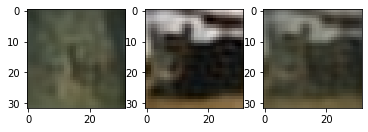

In [ ]:
p_recon = np.dot(p_scores, final_array_loadings)
print(p_recon.shape)
p_recon_blue = p_recon[:, :1024]
p_recon_green = p_recon[:, 1024:2048]
p_recon_red = p_recon[:, 2048:3072]

p_recon_blue = np.reshape(p_recon_blue, (50000, 32,32))
p_recon_green = np.reshape(p_recon_green, (50000, 32,32))
p_recon_red = np.reshape(p_recon_red, (50000, 32,32))
print(p_recon_blue.shape)


p_array_to_show = np.stack((p_recon_blue, p_recon_green, p_recon_red), axis=3)

p_array_to_show = (p_array_to_show*0.5+0.5)
plt.subplot(131)
plt.imshow(array_to_show[score_to_change])
plt.subplot(132)
plt.imshow(array_to_show[score_to_get])
plt.subplot(133)
plt.imshow(p_array_to_show[score_to_change])


In [ ]:
"labels=
array_to_show[labels==1]

(32, 32, 3)

In [ ]:
blabla = array_to_show[np.array(yTrain)==1]
avg = 0
for index in range(blabla.shape[0]):
  avg = avg + blabla[index]

avg = avg/blabla.shape[0] 

In [ ]:
print(avg.shape)

(32, 32, 3)


In [ ]:
p_scores = deepcopy(final_array_score)
p_scores[score_to_change] = new_first_score

In [ ]:
blue_model = pca2(blue_images, 0.95)
red_model = pca2(red_images, 0.95)
green_model = pca2(green_images, 0.95)

In [ ]:
blue_score = np.dot(blue_images,blue_model.components_.T)
blue_loadings = blue_model.components_
print(blue_loadings.shape)
red_score = np.dot(red_images,red_model.components_.T)
red_loadings = red_model.components_

green_score = np.dot(green_images,green_model.components_.T)
green_loadings = green_model.components_

(157, 1024)


In [ ]:
blue_recon = np.dot(blue_score,blue_loadings)
red_recon = np.dot(red_score,red_loadings)
green_recon = np.dot(green_score,green_loadings)

(50000, 32, 32)
(50000, 32, 32)
(50000, 32, 32)
(50000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([23]), array([25]), array([0]))
-0.0035470866235949305


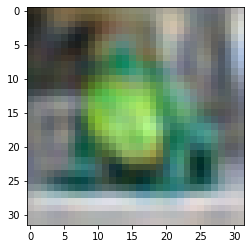

In [ ]:
blue_recon = np.reshape(blue_recon, (50000, 32,32))
print(blue_recon.shape)

red_recon = np.reshape(red_recon, (50000, 32,32))
print(red_recon.shape)

green_recon = np.reshape(green_recon, (50000, 32,32))
print(green_recon.shape)


final_arr = np.stack((blue_recon, green_recon, red_recon), axis= 3)
print(final_arr.shape)
final_arr = (final_arr*0.5+0.5)
plt.imshow(final_arr[19])
arr = final_arr[19]
print(np.where(final_arr[19]<0))
print(final_arr[19][23][25][0]) 
#print(final_arr[19])



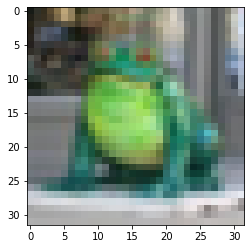

In [ ]:
plt.imshow((xTrain[19]*0.5+0.5))
#lt.imshow(trainData.data[19])

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(blue_score)
kmeans_green = KMeans(n_clusters=10, random_state=0).fit(green_score)
kmeans_red = KMeans(n_clusters=10, random_state=0).fit(red_score)



In [ ]:
kmeans_blue_label = KMeans(n_clusters=10, random_state=0).fit_predict(blue_score)
kmeans_green_label = KMeans(n_clusters=10, random_state=0).fit_predict(green_score)
kmeans_red_label = KMeans(n_clusters=10, random_state=0).fit_predict(red_score)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32)


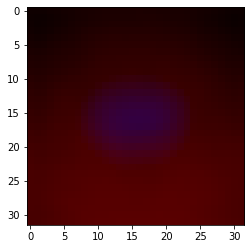

In [ ]:
first_centre_blue = kmeans.cluster_centers_[6]
first_centre_red = kmeans_red.cluster_centers_[2]
first_centre_green = kmeans_green.cluster_centers_[1]

cen_blue_img = np.dot(first_centre_blue, blue_loadings)
cen_red_img = np.dot(first_centre_red, red_loadings)
cen_green_img = np.dot(first_centre_green, green_loadings)

cen_blue_img = np.reshape(cen_blue_img, (32,32))
cen_red_img = np.reshape(cen_red_img, (32,32))
cen_green_img = np.reshape(cen_green_img, (32,32))

print(cen_blue_img.shape)

final_arr_recon = np.stack((cen_blue_img, cen_red_img, cen_green_img), axis= 2)

plt.imshow(final_arr_recon)
